# Displaying the /proc/pressure based metrics

In [5]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Baseline

In [6]:
with open('pressure-metrics/pressure-normal.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [7]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
#data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

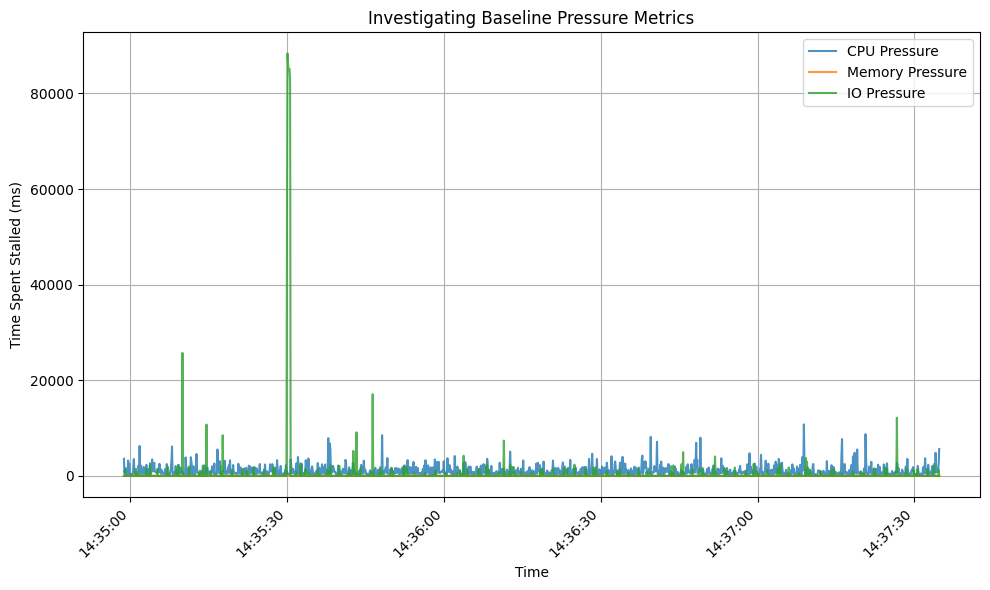

In [8]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Baseline Pressure Metrics")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-baseline.png')
plt.show()

## Single

In [102]:
with open('pressure-metrics/pressure-single.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [103]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
#data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [104]:
with open('pressure-metrics/pressure-single.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [105]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

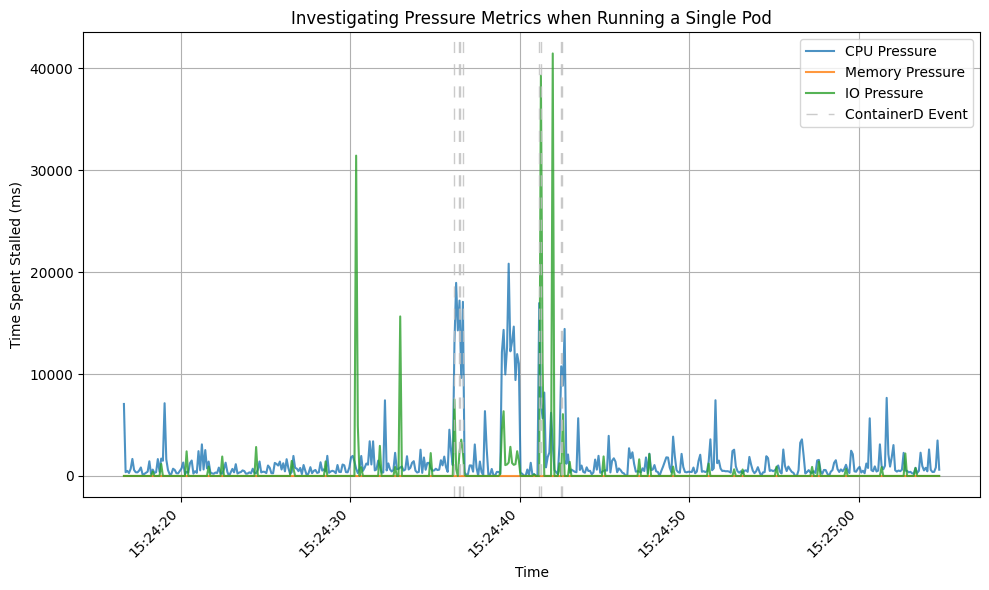

In [106]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Single Pod")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-single.png')
plt.show()

## Small Churn - 5 Pods

In [107]:
with open('pressure-metrics/pressure-smallchurn.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [108]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
#data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [109]:
with open('pressure-metrics/pressure-smallchurn.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [110]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

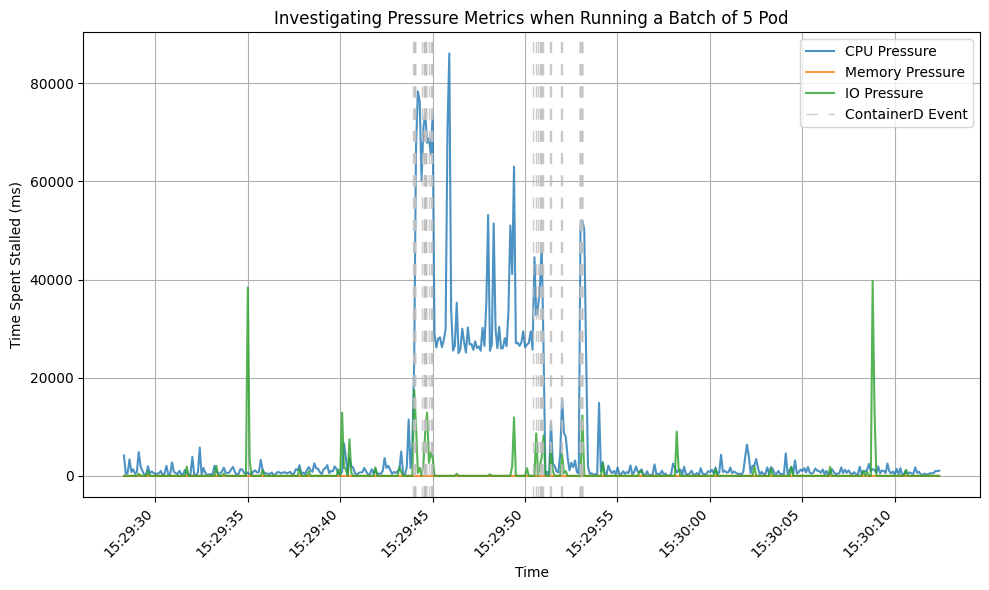

In [111]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Batch of 5 Pod")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-smallbatch.png')
plt.show()

## Churn - 10 Pods

In [112]:
with open('pressure-metrics/pressure-churn.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [113]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
#data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [114]:
with open('pressure-metrics/pressure-churn.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [115]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

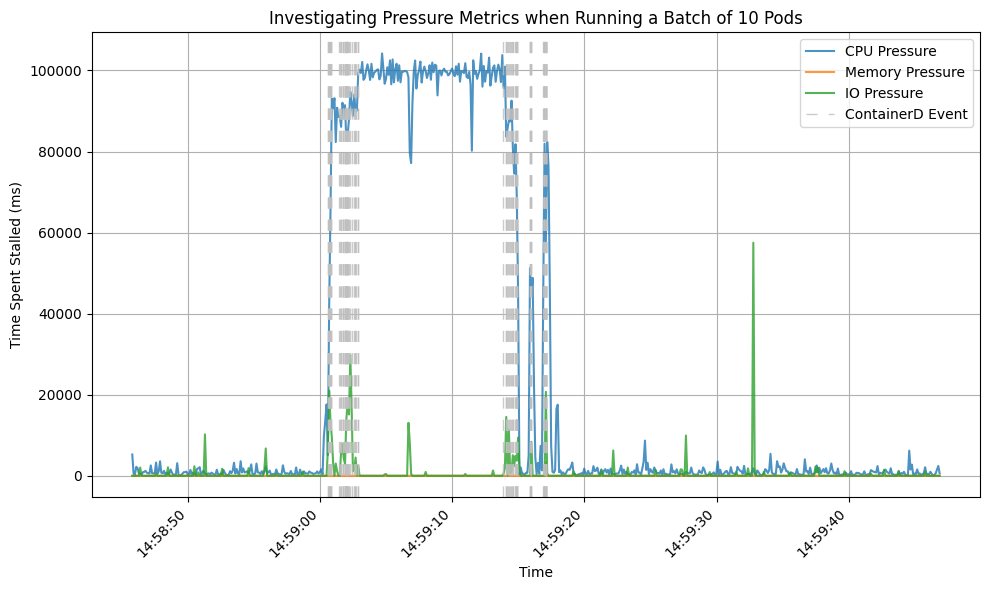

In [116]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Batch of 10 Pods")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-bigbatch.png')
plt.show()

# Pod Completion

In [20]:
!kubectl get pods -o json > pronto.json

In [22]:
import json
import statistics
from datetime import datetime

with open("pronto.json") as f:
    data = json.load(f)

durations = []

for pod in data["items"]:
    try:
        name = pod["metadata"]["name"]
        ns = pod["metadata"]["namespace"]
        start = datetime.fromisoformat(pod["status"]["startTime"].replace("Z", "+00:00"))

        # Get first container’s finished time
        cs = pod["status"]["containerStatuses"][0]
        if "terminated" in cs["state"]:
            finish = datetime.fromisoformat(cs["state"]["terminated"]["finishedAt"].replace("Z", "+00:00"))
            duration = (finish - start).total_seconds()
            durations.append((ns, name, duration))
    except Exception:
        continue

# Print results
for ns, name, dur in durations:
    print(f"{ns}/{name}: {dur:.2f} seconds")

dur = [d[2] for d in durations]
mean = statistics.mean(dur)
std_dev = statistics.stdev(dur)
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

basic-sched/pi-2000-2gkcb: 8.00 seconds
basic-sched/pi-2000-2tdbm: 10.00 seconds
basic-sched/pi-2000-44dlp: 7.00 seconds
basic-sched/pi-2000-459n7: 6.00 seconds
basic-sched/pi-2000-4gmzz: 8.00 seconds
basic-sched/pi-2000-4h48z: 7.00 seconds
basic-sched/pi-2000-4wxwc: 5.00 seconds
basic-sched/pi-2000-4xk5f: 8.00 seconds
basic-sched/pi-2000-526gq: 9.00 seconds
basic-sched/pi-2000-52rf2: 10.00 seconds
basic-sched/pi-2000-5nkm6: 10.00 seconds
basic-sched/pi-2000-5xrwb: 10.00 seconds
basic-sched/pi-2000-66t8j: 10.00 seconds
basic-sched/pi-2000-69ksm: 9.00 seconds
basic-sched/pi-2000-6bljj: 10.00 seconds
basic-sched/pi-2000-6hf4l: 10.00 seconds
basic-sched/pi-2000-6hns7: 5.00 seconds
basic-sched/pi-2000-6kh55: 6.00 seconds
basic-sched/pi-2000-7459v: 7.00 seconds
basic-sched/pi-2000-74zsx: 8.00 seconds
basic-sched/pi-2000-77d4g: 7.00 seconds
basic-sched/pi-2000-7jb6m: 10.00 seconds
basic-sched/pi-2000-89b2m: 7.00 seconds
basic-sched/pi-2000-8f89p: 7.00 seconds
basic-sched/pi-2000-8vjd7: 5.00 

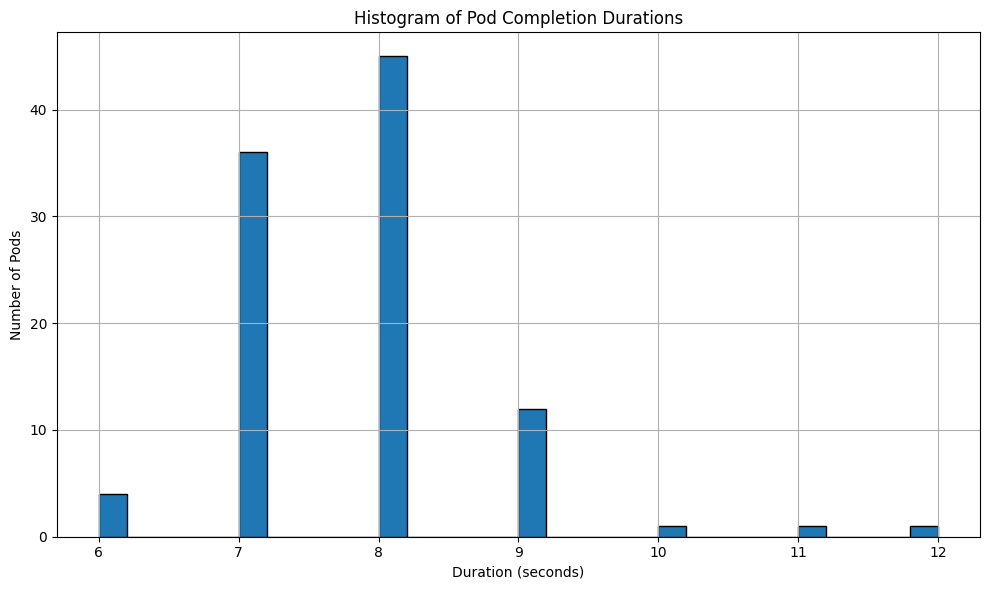

In [23]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

with open("pods1.json") as f:
    data = json.load(f)

durations = []

for pod in data["items"]:
    try:
        name = pod["metadata"]["name"]
        ns = pod["metadata"]["namespace"]
        start = datetime.fromisoformat(pod["status"]["startTime"].replace("Z", "+00:00"))

        # Get first container’s finished time
        cs = pod["status"]["containerStatuses"][0]
        if "terminated" in cs["state"]:
            finish = datetime.fromisoformat(cs["state"]["terminated"]["finishedAt"].replace("Z", "+00:00"))
            duration = (finish - start).total_seconds()
            durations.append(duration)
    except Exception:
        continue

plt.figure(figsize=(10, 6))
plt.hist(durations, bins=30, edgecolor='black')
plt.title("Histogram of Pod Completion Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Pods")
plt.grid(True)
plt.tight_layout()
plt.show()

# Job Completion

In [27]:
!kubectl get jobs -o json > kube-job.json

In [29]:
import json
from datetime import datetime

with open("kube-job.json") as f:
    data = json.load(f)

durations = []

for job in data["items"]:
    try:
        name = job["metadata"]["name"]
        ns = job["metadata"]["namespace"]
        start = datetime.fromisoformat(job["status"]["startTime"].replace("Z", "+00:00"))
        finish = datetime.fromisoformat(job["status"]["completionTime"].replace("Z", "+00:00"))
        duration = (finish - start).total_seconds()
        durations.append((ns, name, duration))
    except KeyError:
        continue  # Job hasn't finished yet

# Print durations
for ns, name, duration in durations:
    print(f"{ns}/{name}: {duration:.2f} seconds")

basic-sched/pi-2000: 14.00 seconds
